In [1]:
import sys
sys.path.append('/global/homes/j/jpiat/')

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from Relativistic_effects.split_mocks import magnitude_bias

In [18]:
file_dens = '/pscratch/sd/s/shadaba/Abacus_wdensity/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006_norsd_wdens.fits'
file_mock = '/global/cfs/cdirs/desi/cosmosim/SecondGenMocks/AbacusSummit/CutSky/BGS/v0.1/z0.200/cutsky_BGS_z0.200_AbacusSummit_base_c000_ph006.fits'

sky = fits.open(file_dens)
dens = sky[1].data
sky.close()

sky = fits.open(file_mock)
print(sky[1].columns)
mock = sky[1].data
sky.close()

ColDefs(
    name = 'R_MAG_APP'; format = 'E'
    name = 'R_MAG_ABS'; format = 'E'
    name = 'G_R_REST'; format = 'E'
    name = 'G_R_OBS'; format = 'E'
    name = 'DEC'; format = 'D'
    name = 'HALO_MASS'; format = 'E'
    name = 'CEN'; format = 'J'
    name = 'RES'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'Z_COSMO'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'FILE_NUM'; format = 'J'
    name = 'HALO_INDEX'; format = 'J'
    name = 'BOX_INDEX'; format = 'J'
    name = 'X_COM'; format = 'E'
    name = 'Y_COM'; format = 'E'
    name = 'Z_COM'; format = 'E'
    name = 'VX'; format = 'E'
    name = 'VY'; format = 'E'
    name = 'VZ'; format = 'E'
    name = 'X_REP'; format = 'J'
    name = 'Y_REP'; format = 'J'
    name = 'Z_REP'; format = 'J'
    name = 'IN_Y1'; format = 'J'
    name = 'NGC_Y1'; format = 'J'
    name = 'SGC_Y1'; format = 'J'
    name = 'N_Y1'; format = 'J'
    name = 'S_Y1'; format = 'J'
    name = 'IN_Y5'; format = 'J'
    name = 'NGC_Y5'; form

In [ ]:
z = dens['Z'] # read the redshifts from the mock
rho = dens['dens_vtf'] # read the densities from Shadab's file

print(len(z),len(rho))

#Array which will contain a number from 0 to 9, corresponding to the density bin each
#galaxy belongs to
rho_bin = np.zeros(len(rho), dtype='i')

zbin_width=0.02
zbins = np.arange(0,1,zbin_width)

# loop through redshift bins
for i in range(len(zbins)-1):
    keep = np.logical_and(z>=zbins[i], z<zbins[i+1])
    if np.count_nonzero(keep) == 0: continue

    # in each bin, find which of the 10 density splits the galaxy is in
    for j in range(1,10,1):
        p = np.percentile(rho[keep], j*10)

        idx = np.logical_and(keep, rho > p)
        rho_bin[idx] += 1

# use the value of rho_bin to find the galaxies in e.g. the lowest density split

# use the value of rho_bin to find the galaxies in e.g. the lowest density split

77209808 77209808


density bin: 0 , magnification bias: 1.4548230663079138
density bin: 1 , magnification bias: 1.2422679654412916
density bin: 2 , magnification bias: 1.1449430008819954
density bin: 3 , magnification bias: 1.073997505948033
density bin: 4 , magnification bias: 1.0235598551189213
density bin: 5 , magnification bias: 0.9750044567247402
density bin: 6 , magnification bias: 0.925011167112047
density bin: 7 , magnification bias: 0.8925812274481348
density bin: 8 , magnification bias: 0.8511795627507438
density bin: 9 , magnification bias: 0.8617935697479929


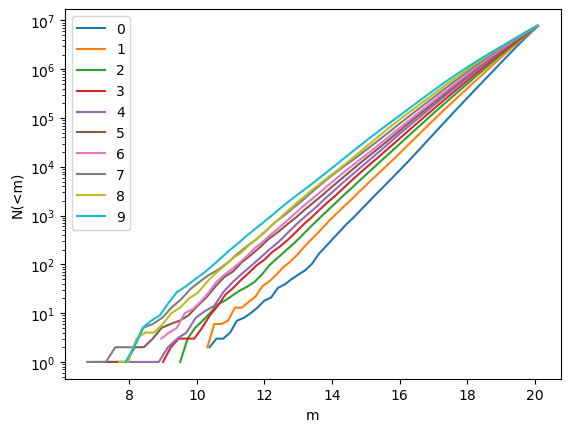

In [15]:
plt.figure()
plt.yscale('log')
plt.ylabel('N(<m)')
plt.xlabel('m')

for j in range(0,10,1):
    keep = rho_bin==j
    m_app = mock['R_MAG_APP'][keep]
    bins = np.linspace(np.min(m_app), np.max(m_app), 50)
    m_binned = (bins[:-1]+bins[1:])*0.5
    h,_ = np.histogram(m_app, bins=bins)
    ch = np.cumsum(h)
    mag_bias = (np.log(ch[-1])-np.log(ch[-2]))/(m_binned[-1]-m_binned[-2])
    print('density bin:',j,', magnification bias:',mag_bias)
    plt.plot(m_binned, ch, label=f'{j}')
    
plt.legend();

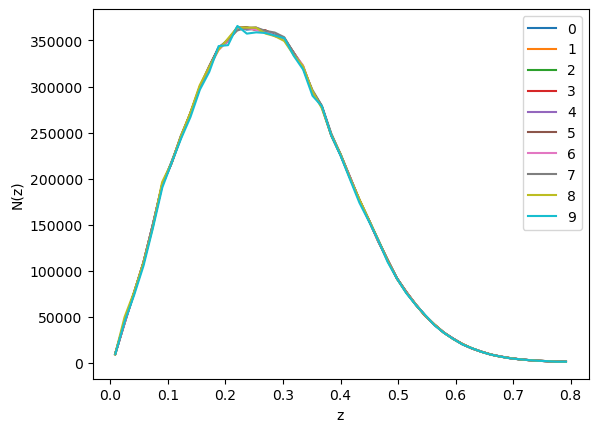

In [17]:
plt.figure()Do you want me to put the magnification bias 
plt.ylabel('N(z)')
plt.xlabel('z')

for j in range(0,10,1):
    keep = rho_bin==j
    z_j = z[keep]
    bins = np.linspace(np.min(z_j), np.max(z_j), 50)
    z_binned = (bins[:-1]+bins[1:])*0.5
    h,_ = np.histogram(z_j, bins=bins)
    plt.plot(z_binned, h, label=f'{j}')
    
plt.legend();